##### Exercise 1 : Manipulation de tableaux NumPy


In [9]:
import numpy as np

#### Définition de la structure du tableau avec des champs spécifiques
dtype_etudiants = np.dtype([
    ('ID', 'i4'),       #### Identifiant de l'étudiant
    ('Nom', 'U20'),     #### Nom de l'étudiant
    ('Moyenne', 'f4')   #### Moyenne de l'étudiant
])

#### Création du tableau avec trois valeurs
etudiants = np.array([
    (1, 'Alicia', 16.5),
    (2, 'Dea', 14.2),
    (3, 'Vanessa', 17.8)
], dtype=dtype_etudiants)


In [ ]:
#### Affichage de tous les noms des étudiants
print("Noms des étudiants:", etudiants['Nom'])

#### Sélection des étudiants ayant une moyenne > 15
etudiants_sup15 = etudiants[etudiants['Moyenne'] > 15]
print("Étudiants avec moyenne > 15:", etudiants_sup15)

#### Tri du tableau par moyenne décroissante
etudiants_trie = np.sort(etudiants, order='Moyenne')[::-1]
print("Étudiants triés par moyenne décroissante:", etudiants_trie)

Exercise 2 - Medical Dataset

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/medical_toy_data.csv")
df.head()

,Patient_ID,Age,Gender,Condition,BMI,Blood_Pressure,Cholesterol,Medications
0,G1,58,Male,Asthma,20.8,159,Low,Metformin
1,G2,71,Male,Hypertension,28.5,121,High,Lisinopril
2,G3,48,Male,Hypertension,27.4,157,Normal,Salbutamol
3,G4,34,Male,Hypertension,21.9,144,Normal,NaN
4,G5,62,Male,NaN,34.1,164,High,Metformin


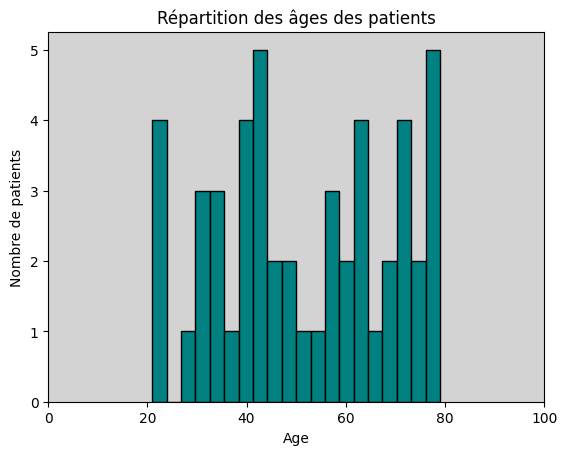

In [7]:
plt.rcParams['axes.facecolor'] = 'lightgray'


#### 1. Création d'un histogramme des âges
df['Age'].hist(bins = 20, edgecolor = 'black', color = 'teal') #### Directement avec df.plot() ou df.hist()
plt.xlabel("Age")
plt.ylabel("Nombre de patients")
plt.title("Répartition des âges des patients")
plt.grid(False)
plt.xlim(0, 100)
plt.show()

In [9]:
#### 2. Calcul des statistiques sur l'âge
age_moyen = df['Age'].mean()
age_median = df['Age'].median()
age_ecart_type = df['Age'].std()
print("Age Moyen: {:.2f} | Age Median: {:.2f} | Écart-type: {:.2f}".format(age_moyen, age_median, age_ecart_type))

Age Moyen: 51.86 | Age Median: 50.50 | Écart-type: 17.70


In [11]:
df.describe()

,Age,BMI,Blood_Pressure
count,50.000000,50.000000,50.000000
mean,51.860000,25.790000,133.560000
std,17.700467,4.396253,27.385502
min,21.000000,18.500000,90.000000
25%,40.000000,22.525000,108.250000
50%,50.500000,25.250000,134.000000
75%,67.500000,28.950000,158.000000
max,79.000000,35.000000,179.000000


Corr: [-0.10974569]


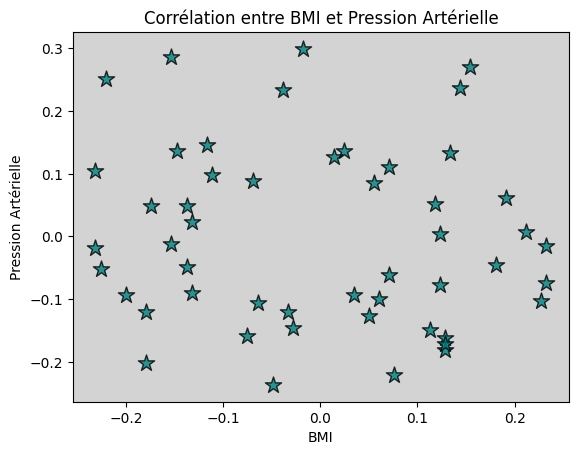

In [22]:
import numpy as np

#### Compute Correlation
normalized_bmi = (df['BMI'].dropna() -np.mean(df['BMI'])) / np.sqrt(np.sum(df['BMI'].dropna()**2))
normalized_blood = (df['Blood_Pressure'] -np.mean(df['BMI'])) / np.sqrt(np.sum(df['Blood_Pressure']**2))
print('Corr: {}'.format(np.correlate(normalized_bmi, normalized_blood)))

df['BMI'] = normalized_bmi
df['Blood_Pressure'] = normalized_blood

### 3. Affichage d'un scatter plot entre BMI et pression artérielle
df.plot.scatter(y = 'BMI', x ='Blood_Pressure', alpha = 0.8, color = 'teal', edgecolors = 'black', marker = '*', s = 150)
plt.xlabel("BMI")
plt.plot()
plt.ylabel("Pression Artérielle")
plt.title("Corrélation entre BMI et Pression Artérielle")
plt.show()

In [25]:
##### 4. Détermination de la pression artérielle moyenne et maximale
pression_moyenne = df['Blood_Pressure'].mean()
pression_max = df['Blood_Pressure'].max()
print('Pression Moyenne: {:.2f} | Pression Maximale: {:.2f}'.format(pression_moyenne, pression_max))

Pression Moyenne: 133.56 | Pression Maximale: 179.00


Patients de plus de 60 ans sous médicament:
1     Lisinopril
4      Metformin
8      Metformin
14     Metformin
20    Salbutamol
23    Salbutamol
27    Lisinopril
31    Salbutamol
33    Lisinopril
35    Lisinopril
37    Salbutamol
38    Lisinopril
40    Lisinopril
43    Lisinopril
44    Lisinopril
45    Lisinopril
46     Metformin
48     Metformin
Name: Medications, dtype: object


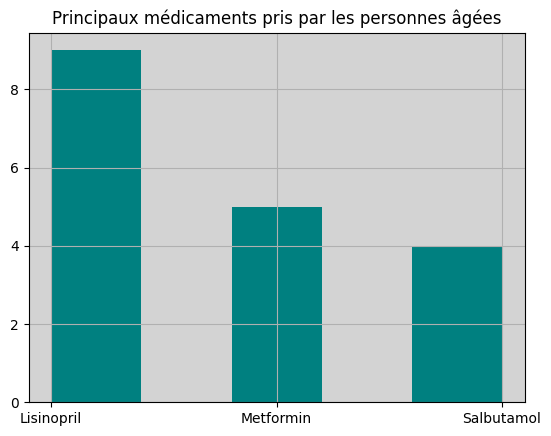

In [28]:
##### 5. Filtrage des patients de plus de 60 ans prenant un médicament
patients_seniors_medicaments = df[(df['Age'] > 60) & (df['Medications'].dropna() != 'None')]
print("Patients de plus de 60 ans sous médicament:")
print(patients_seniors_medicaments['Medications'])
patients_seniors_medicaments['Medications'].hist(color = 'teal', bins = 5)
plt.title('Principaux médicaments pris par les personnes âgées')
plt.show()

In [31]:
df.index = df['Patient_ID']

,Patient_ID,Age,Gender,Condition,BMI,Blood_Pressure,Cholesterol,Medications
0,G1,58,Male,Asthma,20.8,159,Low,Metformin
1,G2,71,Male,Hypertension,28.5,121,High,Lisinopril
2,G3,48,Male,Hypertension,27.4,157,Normal,Salbutamol
3,G4,34,Male,Hypertension,21.9,144,Normal,NaN
4,G5,62,Male,NaN,34.1,164,High,Metformin
5,G6,27,Male,NaN,28.4,145,High,Metformin
6,G7,40,Female,Asthma,30.0,106,High,NaN
7,G8,58,Female,Hypertension,33.0,127,High,Metformin
8,G9,77,Male,Hypertension,28.8,113,High,Metformin
9,G10,38,Female,NaN,23.4,158,Normal,Lisinopril


In [33]:
#### 6. Modification de l'indexation avec l'ID du patient
df.set_index('Patient_ID', inplace = True) #### mettre une colonne comme index
print("DataFrame avec ID du patient comme index:")
df.head()

DataFrame avec ID du patient comme index:


,Age,Gender,Condition,BMI,Blood_Pressure,Cholesterol,Medications
Patient_ID,,,,,,,
G1,58,Male,Asthma,20.8,159,Low,Metformin
G2,71,Male,Hypertension,28.5,121,High,Lisinopril
G3,48,Male,Hypertension,27.4,157,Normal,Salbutamol
G4,34,Male,Hypertension,21.9,144,Normal,NaN
G5,62,Male,NaN,34.1,164,High,Metformin


In [36]:
df.index

Index(['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11',
       'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21',
       'G22', 'G23', 'G24', 'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31',
       'G32', 'G33', 'G34', 'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41',
       'G42', 'G43', 'G44', 'G45', 'G46', 'G47', 'G48', 'G49', 'G50'],
      dtype='object', name='Patient_ID')

In [37]:
##### 7. Création de la colonne 'Risque_Cardiovasculaire'
df['Risque_Cardiovasculaire'] = np.where((df['Blood_Pressure'] > 140) & (df['Cholesterol'] == 'High'), 'Élevé', 'Faible')
print("Ajout de la colonne Risque_Cardiovasculaire:")
df[['Blood_Pressure', 'Cholesterol', 'Risque_Cardiovasculaire']].head(10)

Ajout de la colonne Risque_Cardiovasculaire:


,Blood_Pressure,Cholesterol,Risque_Cardiovasculaire
Patient_ID,,,
G1,159,Low,Faible
G2,121,High,Faible
G3,157,Normal,Faible
G4,144,Normal,Faible
G5,164,High,Élevé
G6,145,High,Élevé
G7,106,High,Faible
G8,127,High,Faible
G9,113,High,Faible


In [39]:
df.head(10)

,Age,Gender,Condition,BMI,Blood_Pressure,Cholesterol,Medications,Risque_Cardiovasculaire
Patient_ID,,,,,,,,
G1,58,Male,Asthma,20.8,159,Low,Metformin,Faible
G2,71,Male,Hypertension,28.5,121,High,Lisinopril,Faible
G3,48,Male,Hypertension,27.4,157,Normal,Salbutamol,Faible
G4,34,Male,Hypertension,21.9,144,Normal,NaN,Faible
G5,62,Male,NaN,34.1,164,High,Metformin,Élevé
G6,27,Male,NaN,28.4,145,High,Metformin,Élevé
G7,40,Female,Asthma,30.0,106,High,NaN,Faible
G8,58,Female,Hypertension,33.0,127,High,Metformin,Faible
G9,77,Male,Hypertension,28.8,113,High,Metformin,Faible


In [41]:
##### 8. Remplacement des valeurs 'None' par 'Healthy' dans la colonne condition médicale
df['Condition'].fillna('Healthy :)', inplace=True)
print("Mise à jour des conditions médicales:")
print(df['Condition'].value_counts())
df.head(10)

Mise à jour des conditions médicales:
Condition
Hypertension    15
Diabetes        14
Asthma          12
Healthy :)       9
Name: count, dtype: int64


C:\Users\genis\AppData\Local\Temp\ipykernel_29268\2632039077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Condition'].fillna('Healthy :)', inplace=True)


,Age,Gender,Condition,BMI,Blood_Pressure,Cholesterol,Medications,Risque_Cardiovasculaire
Patient_ID,,,,,,,,
G1,58,Male,Asthma,20.8,159,Low,Metformin,Faible
G2,71,Male,Hypertension,28.5,121,High,Lisinopril,Faible
G3,48,Male,Hypertension,27.4,157,Normal,Salbutamol,Faible
G4,34,Male,Hypertension,21.9,144,Normal,NaN,Faible
G5,62,Male,Healthy :),34.1,164,High,Metformin,Élevé
G6,27,Male,Healthy :),28.4,145,High,Metformin,Élevé
G7,40,Female,Asthma,30.0,106,High,NaN,Faible
G8,58,Female,Hypertension,33.0,127,High,Metformin,Faible
G9,77,Male,Hypertension,28.8,113,High,Metformin,Faible
